In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar
from scipy import optimize

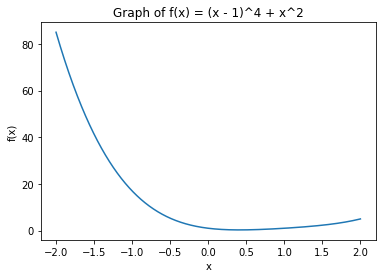

In [2]:
def print_a_function(f, values):
    
    # Generate a range of x-values to plot
    x_values = np.linspace(-2, 2, 1000)

    # Calculate the corresponding y-values for each x-value
    y_values = f(x_values)

    # Create the plot
    plt.plot(x_values, y_values)

    # Add a title and axis labels
    plt.title("Graph of f(x) = (x - 1)^4 + x^2")
    plt.xlabel("x")
    plt.ylabel("f(x)")

    # Display the plot
    plt.show()

f = lambda x : (x - 1)**4 + x**2
values = (-2, 2, 1000)
print_a_function(f, values)

In [3]:
def find_root(f, a, b):
    """
    Uses the bisection method to find a zero of the function f(x) within the interval [a, b].
    Returns the value of x such that |f(x)| < 0.001.
    """
    while abs(b - a) > 0.001:
        # Calculate the midpoint of the interval
        c = (a + b) / 2
        
        # Evaluate f(a), f(b), and f(c)
        fa = f(a)
        fb = f(b)
        fc = f(c)
        
        # Check if f(c) is zero, or if the interval [a, c] or [c, b] contains a zero of f(x)
        if fc == 0 or (fa < 0 and fc > 0) or (fa > 0 and fc < 0):
            b = c
        elif (fb < 0 and fc > 0) or (fb > 0 and fc < 0):
            a = c
        else:
            # There are no zeros in the interval [a, b]
            return None
    
    # Return the midpoint of the final interval as the zero of the function
    return (a + b) / 2

In [4]:
def f_prime(x):
    return 4*(x - 1)**3 + 2*x

In [5]:
root = find_root(f_prime, -10, 10)
print(root)

0.41046142578125


x_min: .02f, f(x_min): .02f (0.41024548853416215, 0.2892734239377779)


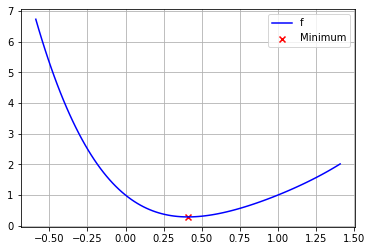

In [6]:
f = lambda x : (x - 1)**4 + x**2
res = minimize_scalar(f, method='brent')
print('x_min: .02f, f(x_min): .02f',  (res.x, res.fun))

# plot curve
x = np.linspace(res.x - 1, res.x + 1, 100)
y = [f(val) for val in x]
plt.plot(x, y, color='blue', label='f')

# plot optima
plt.scatter(res.x, res.fun, color='red', marker='x', label='Minimum')

plt.grid()
plt.legend(loc = 1)

In [13]:
def find_root_bisection(f, min_val, max_val, tol=1e-6, max_iter=100):
    """
    Find the root of function f within the range [min_val, max_val] using the bisection method.

    Parameters:
    f (function): The function to find the root of.
    min_val (float): The minimum value of the range.
    max_val (float): The maximum value of the range.
    tol (float): The tolerance for the root. Default is 1e-6.
    max_iter (int): The maximum number of iterations. Default is 100.

    Returns:
    float: The root of the function.

    Raises:
    ValueError: If the function has the same sign at the endpoints.
    """
    f_min_val = f(min_val)
    f_max_val = f(max_val)
    
    for i in range(max_iter):
        mid_val = (min_val + max_val) / 2
        f_mid_val = f(mid_val)
        if abs(f_mid_val) < tol:
            return mid_val
        if f_mid_val * f_min_val < 0:
            max_val = mid_val
            f_max_val = f_mid_val
        else:
            min_val = mid_val
            f_min_val = f_mid_val
    return mid_val

In [8]:
def find_root_newton_raphson(f, f_deriv, x_0, tol=1e-6, max_iter=1000):
    """
    Find a root of a function using the Newton-Raphson's method.

    Parameters:
    f (function): The function for which the root is to be found.
    f_deriv (function): The derivative of the function f.
    x_0 (float): The initial guess for the root.
    tol (float): The tolerance for the root. The default value is 1e-6.
    max_iter (int): The maximum number of iterations. The default value is 1000.

    Returns:
    float: The root of the function f.
    """
    x_n = x_0
    for i in range(max_iter):
        f_val = f(x_n)
        f_deriv_val = f_deriv(x_n)
        x_n1 = x_n - f_val / f_deriv_val
        if abs(x_n1 - x_n) < tol:
            return x_n1
        x_n = x_n1
    raise ValueError("Maximum number of iterations exceeded.")

In [9]:
def gradient_descent(f, f_prime, start, learning_rate=0.1, eps=1e-6):
    x = start
    while True:
        grad = f_prime(x)
        x_new = x - learning_rate * grad
        if abs(x_new - x) < eps:
            return x_new
        x = x_new

In [10]:
f = lambda x : (x - 1) ** 4 + x ** 2
f_prime = lambda x : 4*((x-1)**3) + 2*x
start = -1
x_min = gradient_descent(f, f_prime, start, 0.01)
f_min = f(x_min)

print("xmin: 0.2f, f(x_min): 0.2f",  (x_min, f_min))

xmin: 0.2f, f(x_min): 0.2f (0.41023044092999633, 0.2892734246366677)


In [11]:
A = np.array([[2,1],[-4,5],[1,-2]])
b = np.array([10,8,3])
c = np.array([-1,-2])

def solve_linear_problem(A, b, c):
    result = optimize.linprog(c = c, A_ub = A, b_ub = b)
    return round(result.fun, 1), result.x

    

optimal_value, optimal_arg = solve_linear_problem(A, b, c)

print("The optimal value is: ", optimal_value, " and is reached for x = ", optimal_arg)

The optimal value is:  -11.0  and is reached for x =  [3. 4.]
